In [ ]:

from google.colab import files

uploaded = files.upload()

Saving tweet_emotions.csv to tweet_emotions (3).csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import io

df = pd.read_csv(io.BytesIO(uploaded['tweet_emotions (3).csv']))
print(df.head())

     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


Exploratory Data Analysis (EDA)

In [7]:
df.columns

Index(['tweet_id', 'sentiment', 'content'], dtype='object')

In [8]:
np.sum(df.isnull().any(axis=1))

0

In [9]:
print(f"Length of dataset is {len(df)}")

Length of dataset is 40000


In [10]:
df.shape

(40000, 3)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [12]:
df.isna().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [13]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [14]:
df['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

In [15]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [16]:
# Storing data in lists.
text = list(df['content'])
sentiment = list(df['sentiment'])

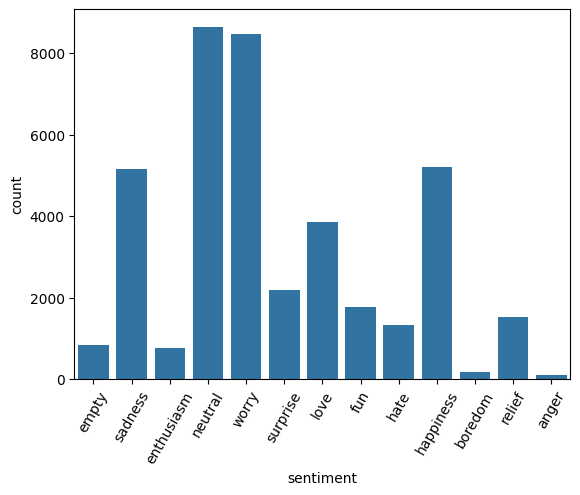

In [17]:
sns.countplot(x='sentiment', data=df)
plt.xticks(rotation=60)
plt.show()

In [18]:
df['tweet_id'].value_counts()

tweet_id
1956967341    1
1695478035    1
1695477627    1
1695477640    1
1695477692    1
             ..
1963996234    1
1963996702    1
1963997248    1
1963997588    1
1753919049    1
Name: count, Length: 40000, dtype: int64

In [19]:
df.drop("tweet_id", inplace=True, axis='columns')
df

sentiment                                            content
0           empty  @tiffanylue i know  i was listenin to bad habi...
1         sadness  Layin n bed with a headache  ughhhh...waitin o...
2         sadness                Funeral ceremony...gloomy friday...
3      enthusiasm               wants to hang out with friends SOON!
4         neutral  @dannycastillo We want to trade with someone w...
...           ...                                                ...
39995     neutral                                   @JohnLloydTaylor
39996        love                     Happy Mothers Day  All my love
39997        love  Happy Mother's Day to all the mommies out ther...
39998   happiness  @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999        love  @mopedronin bullet train from tokyo    the gf ...

[40000 rows x 2 columns]

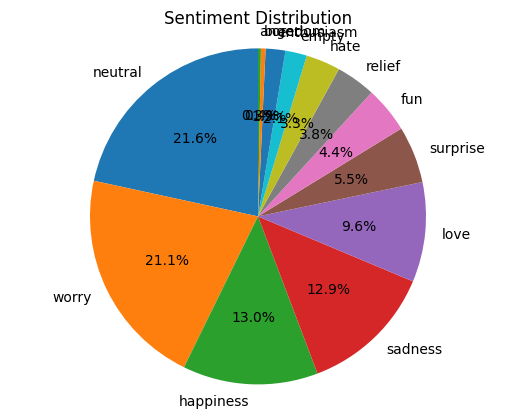

In [20]:
# @title Sentiment Distribution

import matplotlib.pyplot as plt

sentiment_counts = df['sentiment'].value_counts()

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
_ = plt.axis('equal')

Distribution of the Length of the Texts

In [21]:
import plotly.express as px

In [22]:
df['length_of_text'] = [len(i.split(' ')) for i in df['content']]

fig = px.histogram(df['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text"})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=22))
fig.show()


Distribution of the Length of the Texts by Emotions

In [23]:
fig = px.histogram(df['length_of_text'], marginal='box',
                   labels={"value": "Length of the Text"},
                   color=df['sentiment'])
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts by Sentiments',
                  title_x=0.5, title_font=dict(size=22))
fig.show()


Distribution of the Labels


In [24]:

fig = px.histogram(df, x='sentiment', color='sentiment')
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Sentiments',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

In [25]:
FreqOfWords = df['content'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

top_words_df = pd.DataFrame({'word': FreqOfWords_top200.index, 'frequency': FreqOfWords_top200.values})

import plotly.express as px

fig = px.treemap(top_words_df, path=['word'], values='frequency')
fig.update_layout(title_text='Frequency of the Words in the  Dataset', title_x=0.5, title_font=dict(size=22))
fig.update_traces(textinfo="label+value")
fig.show()

Data Preprocessing

In [26]:
# text preprocessing


In [27]:
# Making text to lower case
df['content']=df['content'].str.lower()
df['content'].tail()

39995                                     @johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998    @niariley wassup beautiful!!! follow me!!  pee...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, dtype: object

In [28]:
# Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
             'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [29]:
# Cleaning and removing the above stop words list from the tweets
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(content):
    return " ".join([word for word in str(content).split() if word not in STOPWORDS])
df['content'] = df['content'].apply(lambda content: cleaning_stopwords(content))
df['content'].head()

0    @tiffanylue know listenin bad habit earlier st...
1         layin n bed headache ughhhh...waitin call...
2                  funeral ceremony...gloomy friday...
3                             wants hang friends soon!
4    @dannycastillo want trade someone houston tick...
Name: content, dtype: object

In [30]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(content):
    translator = str.maketrans('', '', punctuations_list)
    return content.translate(translator)
df['content']= df['content'].apply(lambda x: cleaning_punctuations(x))
df['content'].tail()

39995                                      johnlloydtaylor
39996                               happy mothers day love
39997    happy mothers day mommies there woman man long...
39998    niariley wassup beautiful follow me peep new h...
39999    mopedronin bullet train tokyo gf visiting japa...
Name: content, dtype: object

In [31]:
import re
# Cleaning and removing repeating character
def cleaning_repeating_char(content):
    return re.sub(r'(.)1+', r'1', content)
df['content'] = df['content'].apply(lambda x: cleaning_repeating_char(x))
df['content'].tail()

39995                                      johnlloydtaylor
39996                               happy mothers day love
39997    happy mothers day mommies there woman man long...
39998    niariley wassup beautiful follow me peep new h...
39999    mopedronin bullet train tokyo gf visiting japa...
Name: content, dtype: object

In [32]:
# Cleaning and removing URLs
def cleaning_URLs(df):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',df)
df['content'] = df['content'].apply(lambda x: cleaning_URLs(x))
df['content'].tail()

39995                                      johnlloydtaylor
39996                               happy mothers day love
39997    happy mothers day mommies there woman man long...
39998    niariley wassup beautiful follow me peep new h...
39999    mopedronin bullet train tokyo gf visiting japa...
Name: content, dtype: object

In [33]:
# Cleaning and removing numeric numbers
def cleaning_numbers(df):
    return re.sub('[0-9]+', '', df)
df['content'] = df['content'].apply(lambda x: cleaning_numbers(x))
df['content'].tail()

39995                                      johnlloydtaylor
39996                               happy mothers day love
39997    happy mothers day mommies there woman man long...
39998    niariley wassup beautiful follow me peep new h...
39999    mopedronin bullet train tokyo gf visiting japa...
Name: content, dtype: object

In [34]:
# Tokenization of tweet text
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['content'] = df['content'].apply(tokenizer.tokenize)
df['content'].head()

0    [tiffanylue, know, listenin, bad, habit, earli...
1        [layin, n, bed, headache, ughhhhwaitin, call]
2                    [funeral, ceremonygloomy, friday]
3                         [wants, hang, friends, soon]
4    [dannycastillo, want, trade, someone, houston,...
Name: content, dtype: object

In [35]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(df):
    text = [st.stem(word) for word in df]
    return df
df['content'] = df['content'].apply(lambda x: stemming_on_text(x))
df['content'].head()

0    [tiffanylue, know, listenin, bad, habit, earli...
1        [layin, n, bed, headache, ughhhhwaitin, call]
2                    [funeral, ceremonygloomy, friday]
3                         [wants, hang, friends, soon]
4    [dannycastillo, want, trade, someone, houston,...
Name: content, dtype: object

In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
from nltk.stem import WordNetLemmatizer
# Applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(df):
    text = [lm.lemmatize(word) for word in df]
    return df
df['content'] = df['content'].apply(lambda x: lemmatizer_on_text(x))
df['content'].head()

0    [tiffanylue, know, listenin, bad, habit, earli...
1        [layin, n, bed, headache, ughhhhwaitin, call]
2                    [funeral, ceremonygloomy, friday]
3                         [wants, hang, friends, soon]
4    [dannycastillo, want, trade, someone, houston,...
Name: content, dtype: object

In [38]:
text = df.content[0]

In [39]:
from wordcloud import WordCloud

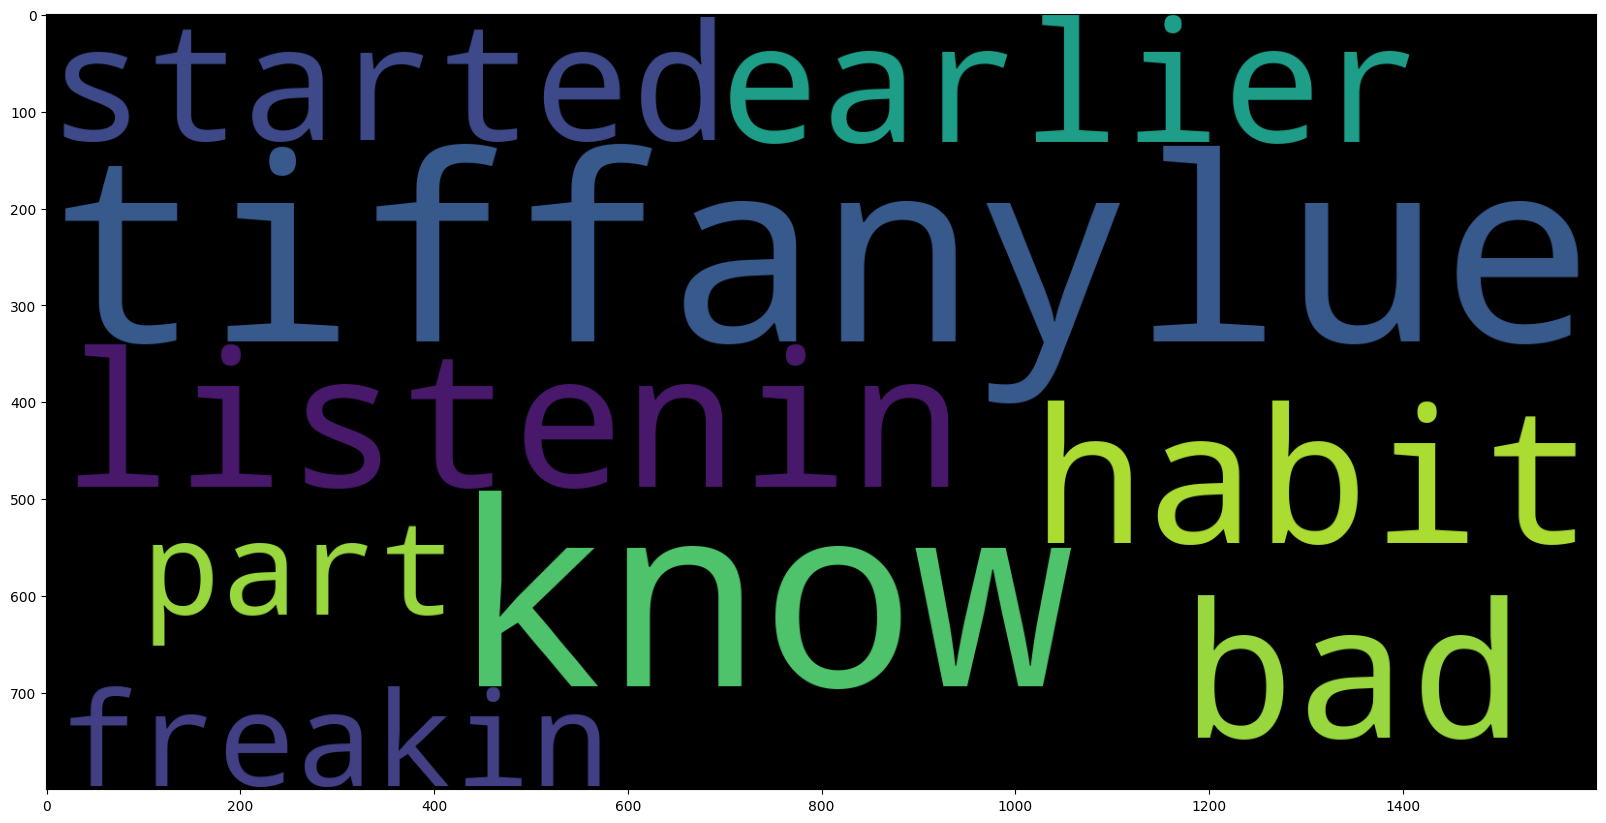

In [40]:
# Start with one review:
text = df.content[0]

# Create and generate a word cloud image:

# Display the generated image:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(text))
plt.imshow(wc);

In [41]:
empty_data = df[df['sentiment'] == 'empty']
sadness_data = df[df['sentiment'] == 'sadness']
enthusiasm_data = df[df['sentiment'] == 'enthusiasm']
neutral_data = df[df['sentiment'] == 'neutral']
worry = df[df['sentiment'] == 'worry']
surprise_data = df[df['sentiment'] == 'surprise']
love_data = df[df['sentiment'] == 'love']
fun_data = df[df['sentiment'] == 'fun']
hate_data = df[df['sentiment'] == 'hate']
happiness_data = df[df['sentiment'] == 'happiness']
boredom_data = df[df['sentiment'] == 'boredom']
relief_data = df[df['sentiment'] == 'relief']
anger_data = df[df['sentiment'] == 'anger']

In [42]:
empty_data

sentiment                                            content  \
0         empty  [tiffanylue, know, listenin, bad, habit, earli...   
44        empty  [creyes, middle, school, elem, high, schools, ...   
52        empty       [djmicdamn, hey, yu, lil, fucker, textd, yu]   
141       empty  [softtouchme, answered, you, never, learned, w...   
180       empty              [headache, im, going, bed, goodnight]   
...         ...                                                ...   
39702     empty  [go, again, back, work, happy, mothers, day, p...   
39742     empty  [philippajane, quotno, pantsquot, idea, could,...   
39749     empty                                [sloanyxxx, thanks]   
39845     empty                 [xxxrobyn, yeah, fingers, crossed]   
39975     empty     [lexia, even, listen, susans, green, policies]   

       length_of_text  
0                  19  
44                 20  
52                  8  
141                14  
180                 9  
...               ...  
39702              14  
39742              18  
39749               2  
39845               4  
39975               8  

[827 rows x 3 columns]

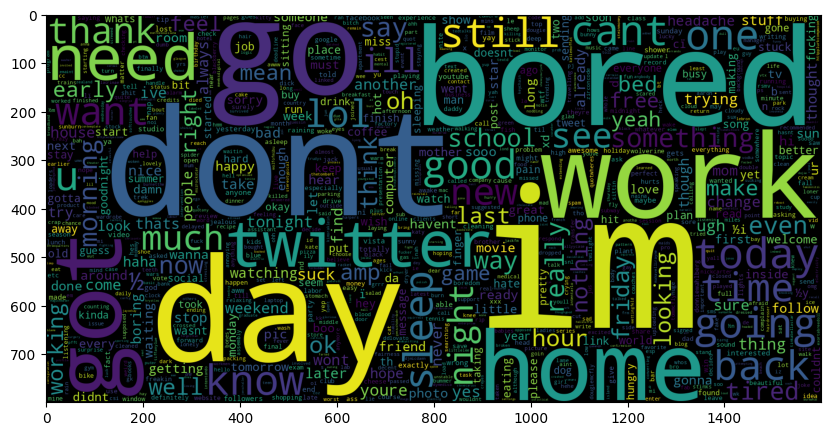

In [43]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in empty_data["content"] for word in sublist]))
plt.imshow(wc);

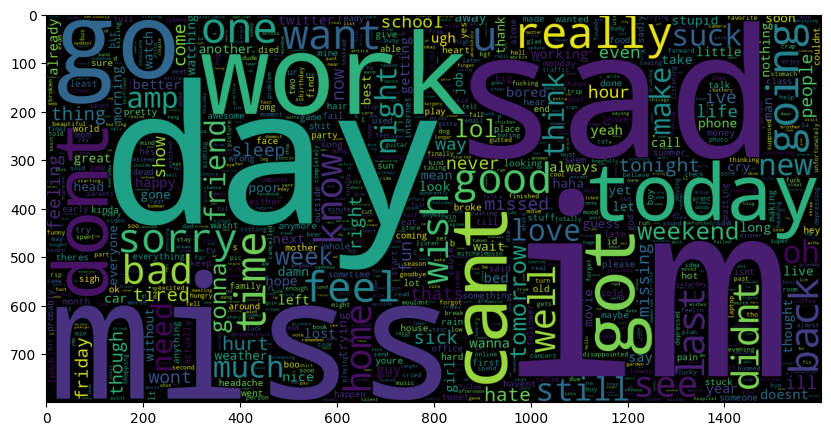

In [44]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in sadness_data["content"] for word in sublist]))
plt.imshow(wc);

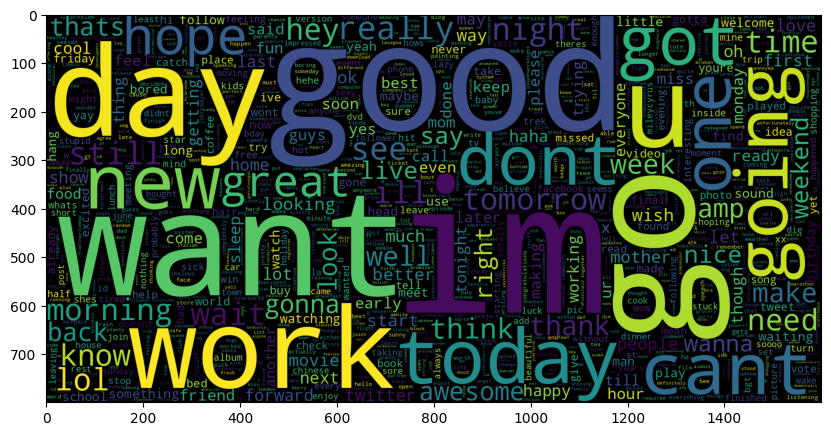

In [45]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in enthusiasm_data["content"] for word in sublist]))
plt.imshow(wc);

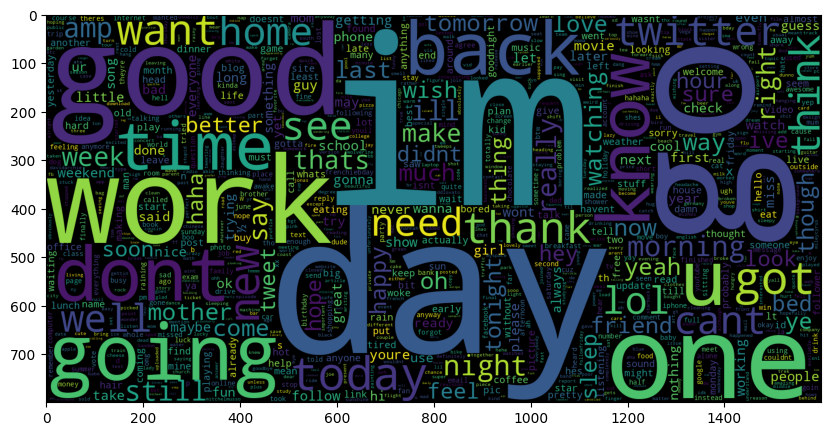

In [46]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in neutral_data["content"] for word in sublist]))
plt.imshow(wc);

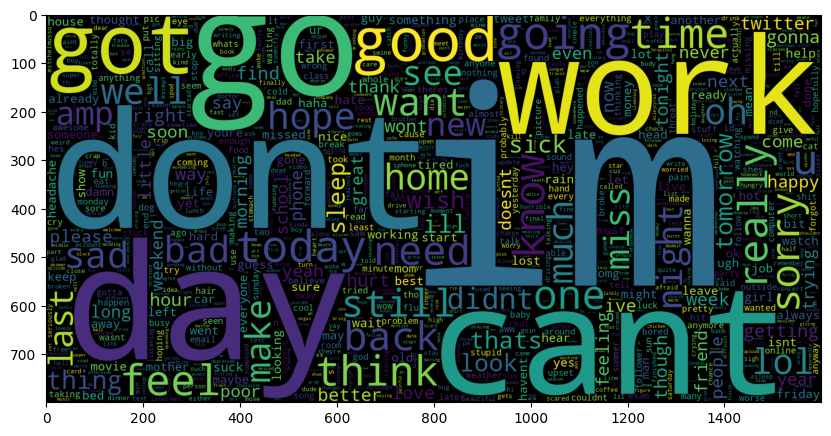

In [47]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in worry["content"] for word in sublist]))
plt.imshow(wc);

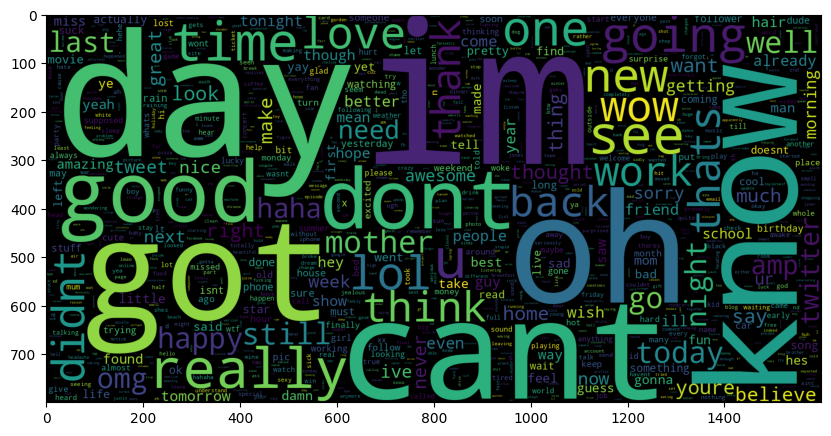

In [48]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in surprise_data["content"] for word in sublist]))
plt.imshow(wc);

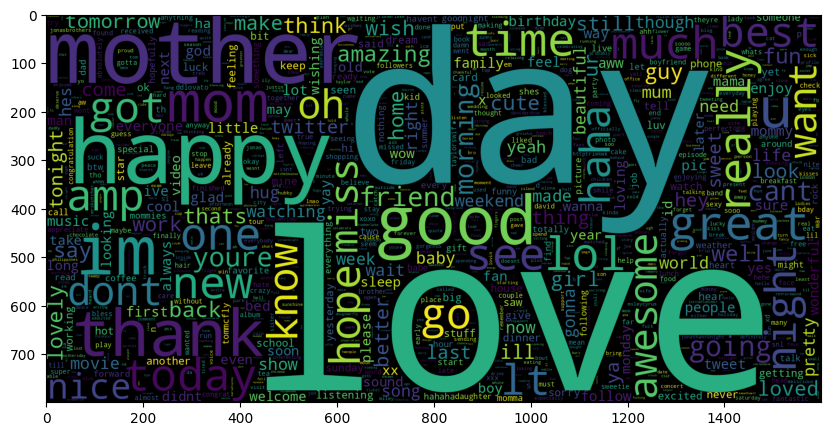

In [49]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in love_data["content"] for word in sublist]))
plt.imshow(wc);

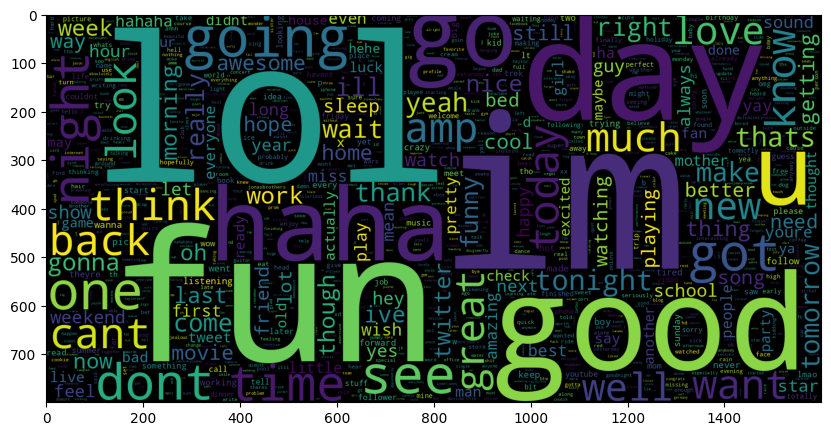

In [50]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in fun_data["content"] for word in sublist]))
plt.imshow(wc);

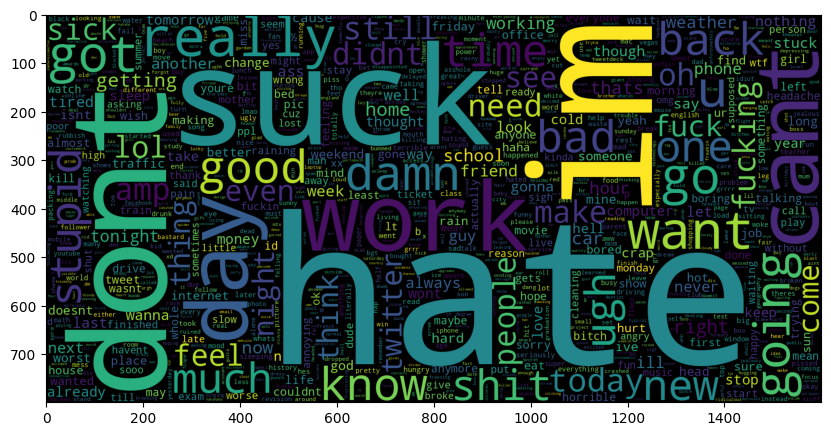

In [51]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in hate_data["content"] for word in sublist]))
plt.imshow(wc);

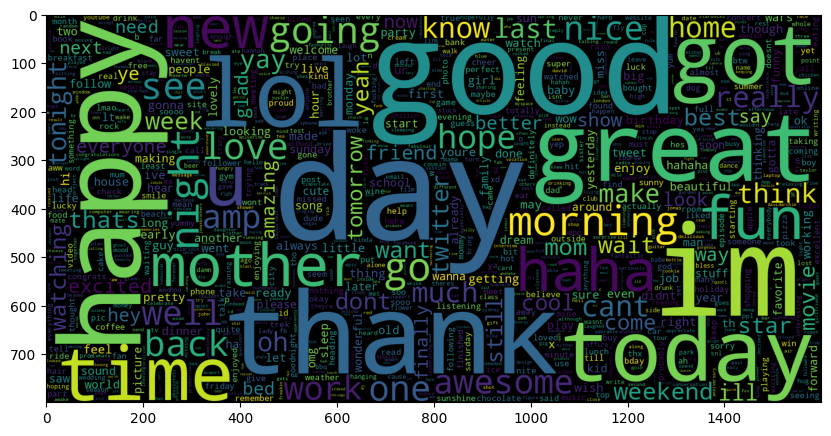

In [52]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in happiness_data["content"] for word in sublist]))
plt.imshow(wc);

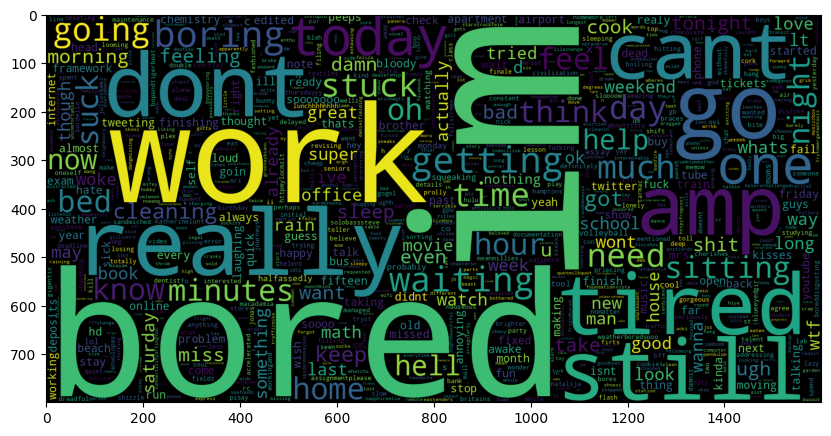

In [53]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in boredom_data["content"] for word in sublist]))
plt.imshow(wc);

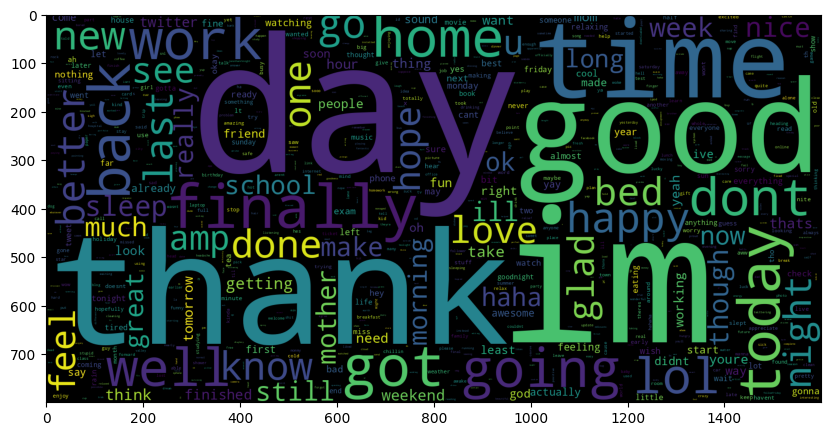

In [54]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in relief_data["content"] for word in sublist]))
plt.imshow(wc);

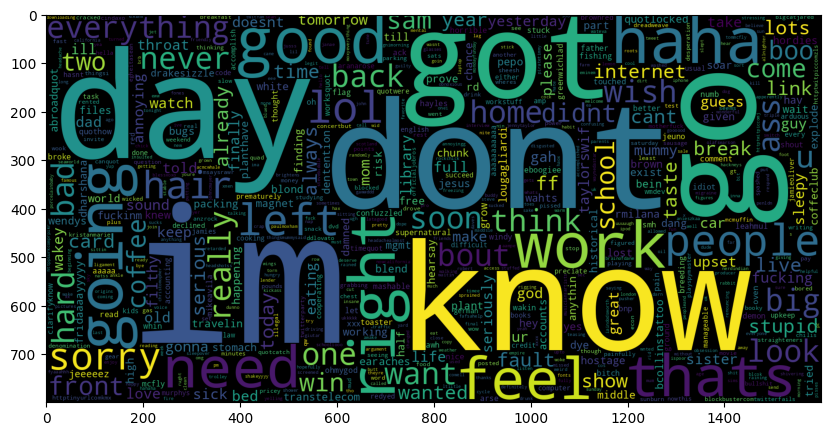

In [55]:
# Display the worrd cloud image for sentiments :
plt.figure(figsize = (10,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join([word for sublist in anger_data["content"] for word in sublist]))
plt.imshow(wc);

Modelling : 20% test

In [56]:
df['content'] = df['content'].str.join(' ')
df.head()

sentiment                                            content  \
0       empty  tiffanylue know listenin bad habit earlier sta...   
1     sadness             layin n bed headache ughhhhwaitin call   
2     sadness                      funeral ceremonygloomy friday   
3  enthusiasm                            wants hang friends soon   
4     neutral  dannycastillo want trade someone houston ticke...   

   length_of_text  
0              19  
1              11  
2               3  
3               7  
4              15

In [57]:
X=df.content
y=df.sentiment

In [58]:
from sklearn.model_selection import train_test_split

LSTM with TensorFlow and Keras

In [59]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [60]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['content'])
sequences = tokenizer.texts_to_sequences(df['content'])
X = pad_sequences(sequences, maxlen=200)

In [64]:
# Assuming 'sentiment' is a list of sentiment labels
y = pd.DataFrame({'sentiment': sentiment})  # Create a DataFrame from the list

encoding = {
    'empty': 0, 'sadness': 1, 'enthusiasm': 2, 'neutral': 3, 'worry': 4, 'surprise': 5,
    'love': 6, 'fun': 7, 'hate': 8, 'happiness': 9, 'boredom': 10, 'relief': 11, 'anger': 12
}

# Integer labels
y = [encoding[x] for x in y.sentiment]


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state =42)

In [66]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [67]:
# Define the LSTM model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=5, input_length=200),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(13, activation='softmax')  # Output layer with one neuron per category
])

In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
# Train the model
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model's performance
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/5
1000/1000 [==============================] - 208s 204ms/step - loss: 2.1542 - accuracy: 0.2218 - val_loss: 2.0781 - val_accuracy: 0.2564
Epoch 2/5
1000/1000 [==============================] - 177s 177ms/step - loss: 1.9900 - accuracy: 0.3135 - val_loss: 1.9551 - val_accuracy: 0.3316
Epoch 3/5
1000/1000 [==============================] - 184s 184ms/step - loss: 1.8758 - accuracy: 0.3682 - val_loss: 1.9337 - val_accuracy: 0.3428
Epoch 4/5
1000/1000 [==============================] - 177s 177ms/step - loss: 1.8312 - accuracy: 0.3852 - val_loss: 1.9483 - val_accuracy: 0.3349
Epoch 5/5
250/250 [==============================] - 13s 53ms/step - loss: 1.9671 - accuracy: 0.3257
Test Accuracy: 0.3257499933242798


In [71]:
pred_test = model.predict(X_test) > 0.5

250/250 [==============================] - 18s 58ms/step


In [79]:
pred_test

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])